**Name:** Pratibha Gupta \
**Batch:** Afternoon, ML-14 \
**Data:** Pokemon data

**Questions**  \
#Perform Descriptive and Exploratory analysis on the data.
1. describe and interpret the data
2. group by based on the categorical values. and find out frequency distribution of the data
3. Find out  central tendency and interpret
4. Interpret the spread of the data (use all methods to explain spread of the data)
5. Interpret the kurtosis and skewness of the each features.

**Variable Description**
- name: The English name of the Pokemon
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- Total: 
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- is_legendary: Denotes if the Pokemon is legendary.

In [1]:
# Import necessary libraries
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings                 
warnings.filterwarnings('ignore')

In [2]:
#Import data
P_data=pd.read_csv(r'C:\Users\hp\Downloads\ML_ClassRecording\Pokemon.csv')
P_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
P_data.drop(columns='#',axis=0,inplace=True)    # drop unnecessary column 

In [4]:
P_data.shape    ## Dimension of the data

(800, 12)

In data, there are 800 observations with 12 variables.

In [5]:
P_data.isnull().sum()   ## Checking null/missing number of observations

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Variable 'Type 2' has 386 missing observations which is quite large. Rest variables has '0' missing observations

In [6]:
P_data.info()    ## information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


- Variables 'Name','Type 1', 'Type 2' has string data type
- Variables 'Total','HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed', 'Generation' shows integer data type.
- Variable legendary is a boolean data type.

In [7]:
## Unique values of variables
print('Unique Values of Type 1: \n',P_data['Type 1'].unique())
print('Unique Values of Type 2: \n',P_data['Type 2'].unique())
print('Number of Unique Values of HP: ',P_data['HP'].nunique())
print('Number of Unique Values of Attack: ',P_data['Attack'].nunique())
print('Numebr of Unique Values of Special Attack: ',P_data['Sp. Atk'].nunique())
print('Number of Unique Values of Special Defence: ',P_data['Sp. Def'].nunique())
print('Number of Unique Values of Speed: ',P_data['Speed'].nunique())
print('Unique Values of Generation: ',P_data['Generation'].unique())
print('Unique Values of Legendary: ',P_data['Legendary'].unique())

Unique Values of Type 1: 
 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Unique Values of Type 2: 
 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
Number of Unique Values of HP:  94
Number of Unique Values of Attack:  111
Numebr of Unique Values of Special Attack:  105
Number of Unique Values of Special Defence:  92
Number of Unique Values of Speed:  108
Unique Values of Generation:  [1 2 3 4 5 6]
Unique Values of Legendary:  [False  True]


- In data variable Generation has 6 generations in which pokemon was introduced.
- Variable legendary has two outcomes of true and false which indicates pokemon is legendory or not respectively.

In [8]:
P_data[P_data['Generation']>3][['Type 1','Type 2','Speed']]

,Type 1,Type 2,Speed
432,Grass,NaN,31
433,Grass,NaN,36
434,Grass,Ground,56
435,Fire,NaN,61
436,Fire,Fighting,81
...,...,...,...
795,Rock,Fairy,50
796,Rock,Fairy,110
797,Psychic,Ghost,70
798,Psychic,Dark,80


In [9]:
P_data['Type 2'].value_counts()     #frequency of unique values in Type 2 variable.

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [10]:
P_data['Type 2'].fillna('Flying',inplace=True)    ##filling missing observations

In [11]:
plt.style.available  

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
P_data.groupby('Type 1')['Type 2'].count()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Type 2, dtype: int64

In [31]:
style.use('classic')
P_data.groupby('Type 1')[['Attack','Defense','Sp. Atk','Sp. Def']].count()#.plot(subplots=True,kind='pie',figsize=(20,20),fontsize=9.8,autopct='%1.1f%%')
#plt.legend(loc='lower right', bbox_to_anchor=(-0.00005,-0.000015))
#plt.show()

,Attack,Defense,Sp. Atk,Sp. Def
Type 1,,,,
Bug,69,69,69,69
Dark,31,31,31,31
Dragon,32,32,32,32
Electric,44,44,44,44
Fairy,17,17,17,17
Fighting,27,27,27,27
Fire,52,52,52,52
Flying,4,4,4,4
Ghost,32,32,32,32


- Base Attack, Base Defense, Special Attack, Special Defense of the pokemon is same in all Primary type of pokemon.

In [32]:
#2)Group by data and find out frequency distribution of the data
style.use('bmh')
P_data.groupby('Type 2')[['Attack','Defense','Sp. Atk','Sp. Def']].count()#.plot(kind='pie',figsize=(10,8),fontsize=9.8,autopct='%1.1f%%')
#plt.legend(loc='lower right', bbox_to_anchor=(-0.05,-0.15))
#plt.show()

,Attack,Defense,Sp. Atk,Sp. Def
Type 2,,,,
Bug,3,3,3,3
Dark,20,20,20,20
Dragon,18,18,18,18
Electric,6,6,6,6
Fairy,23,23,23,23
Fighting,26,26,26,26
Fire,12,12,12,12
Flying,483,483,483,483
Ghost,14,14,14,14


- Base Attack, Base Defense, Special Attack, Special Defense of the pokemon is same in all Secondary type of pokemon.

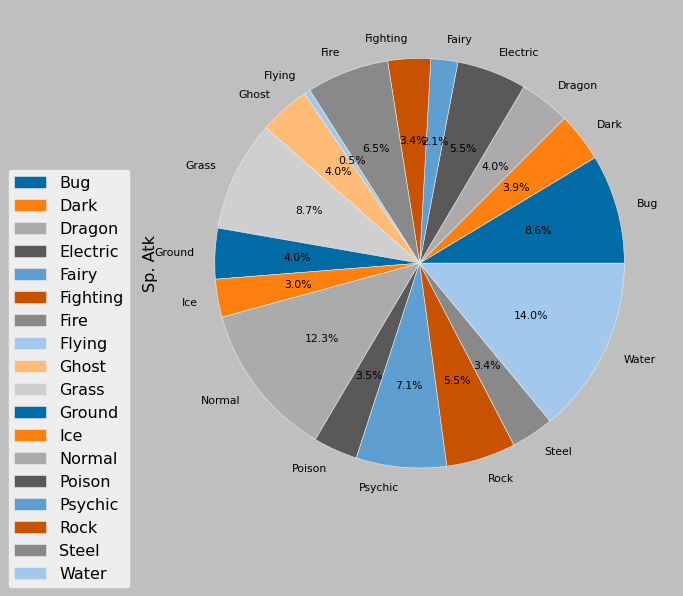

In [15]:
# Pie chart
style.use('tableau-colorblind10')
P_data.groupby('Type 1')['Sp. Atk'].count().plot(subplots=True,kind='pie',figsize=(10,8),fontsize=9.8,autopct='%1.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(-0.05,-0.15))
plt.show()

- Specail Attack by pokemon in water type pokemon is 14%,in normal type pokemon is 12.3%,in bug type of pokemon base attack is 8.6%,in Grass type of pokemon base attack is 8.7%.These are the most frequent attacks in types of pokemon.All these types are primary types of pokemon, and the percentage of base defense, base attack, special defence and special attacks are same in primary type of pokemon, so the pie chart would be same for all variables if we consider in respect to Type 1 variable.

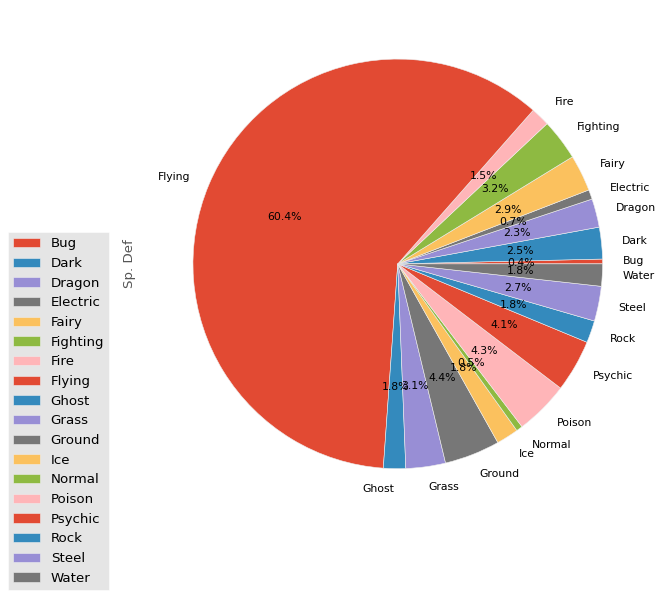

In [35]:
style.use('ggplot')
P_data.groupby('Type 2')['Sp. Def'].count().plot(subplots=True,kind='pie',figsize=(10,8),fontsize=9.8,autopct='%1.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(-0.05,-0.15))
plt.show()

- Specail defence by pokemon in Flying type pokemon is 60.4%,in Fighting type pokemon is 3.2%,These are the most frequent special defence in types of pokemon.All these types are Secondary types of pokemon, and the percentage of base defense, base attack, special defence and special attacks are same in Secondary type of pokemon, so the pie chart would be same for all variables if we consider in respect to Type 2 variable.

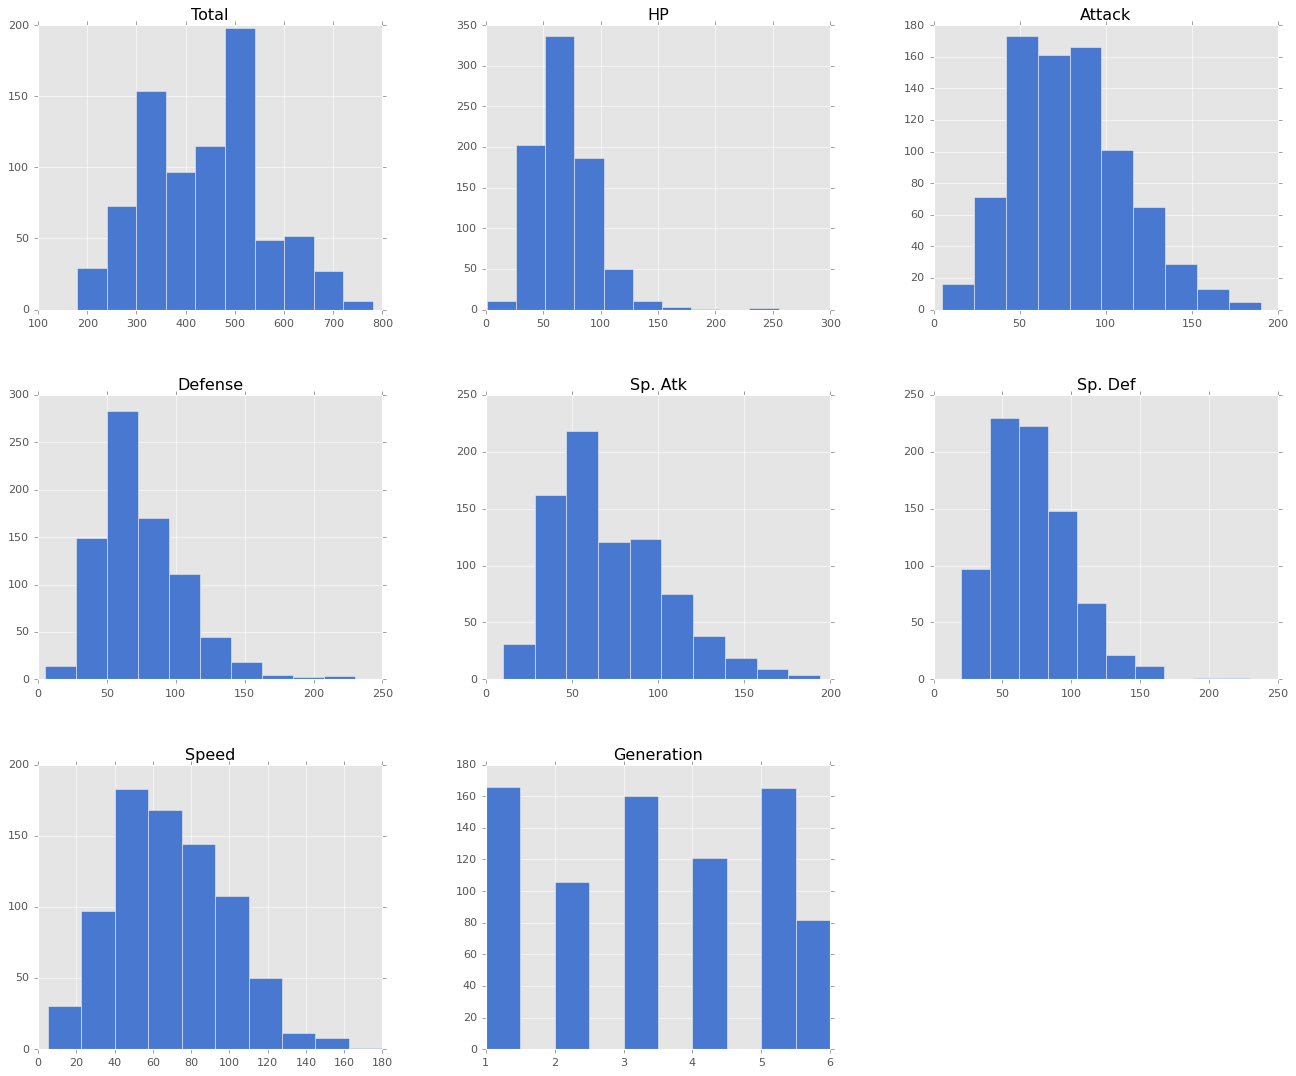

In [17]:
#Histogram of the data
style.use('seaborn-muted')
P_data.hist(figsize=(20,16))
plt.show()

- Nature of Histogram of variable 'Generation' shows that it is categorical variable and i can say distribution is discrete uniform distribution.
- Rest All the variables are continous.
Let's see density plot which interpret the variables distribution in a better way.

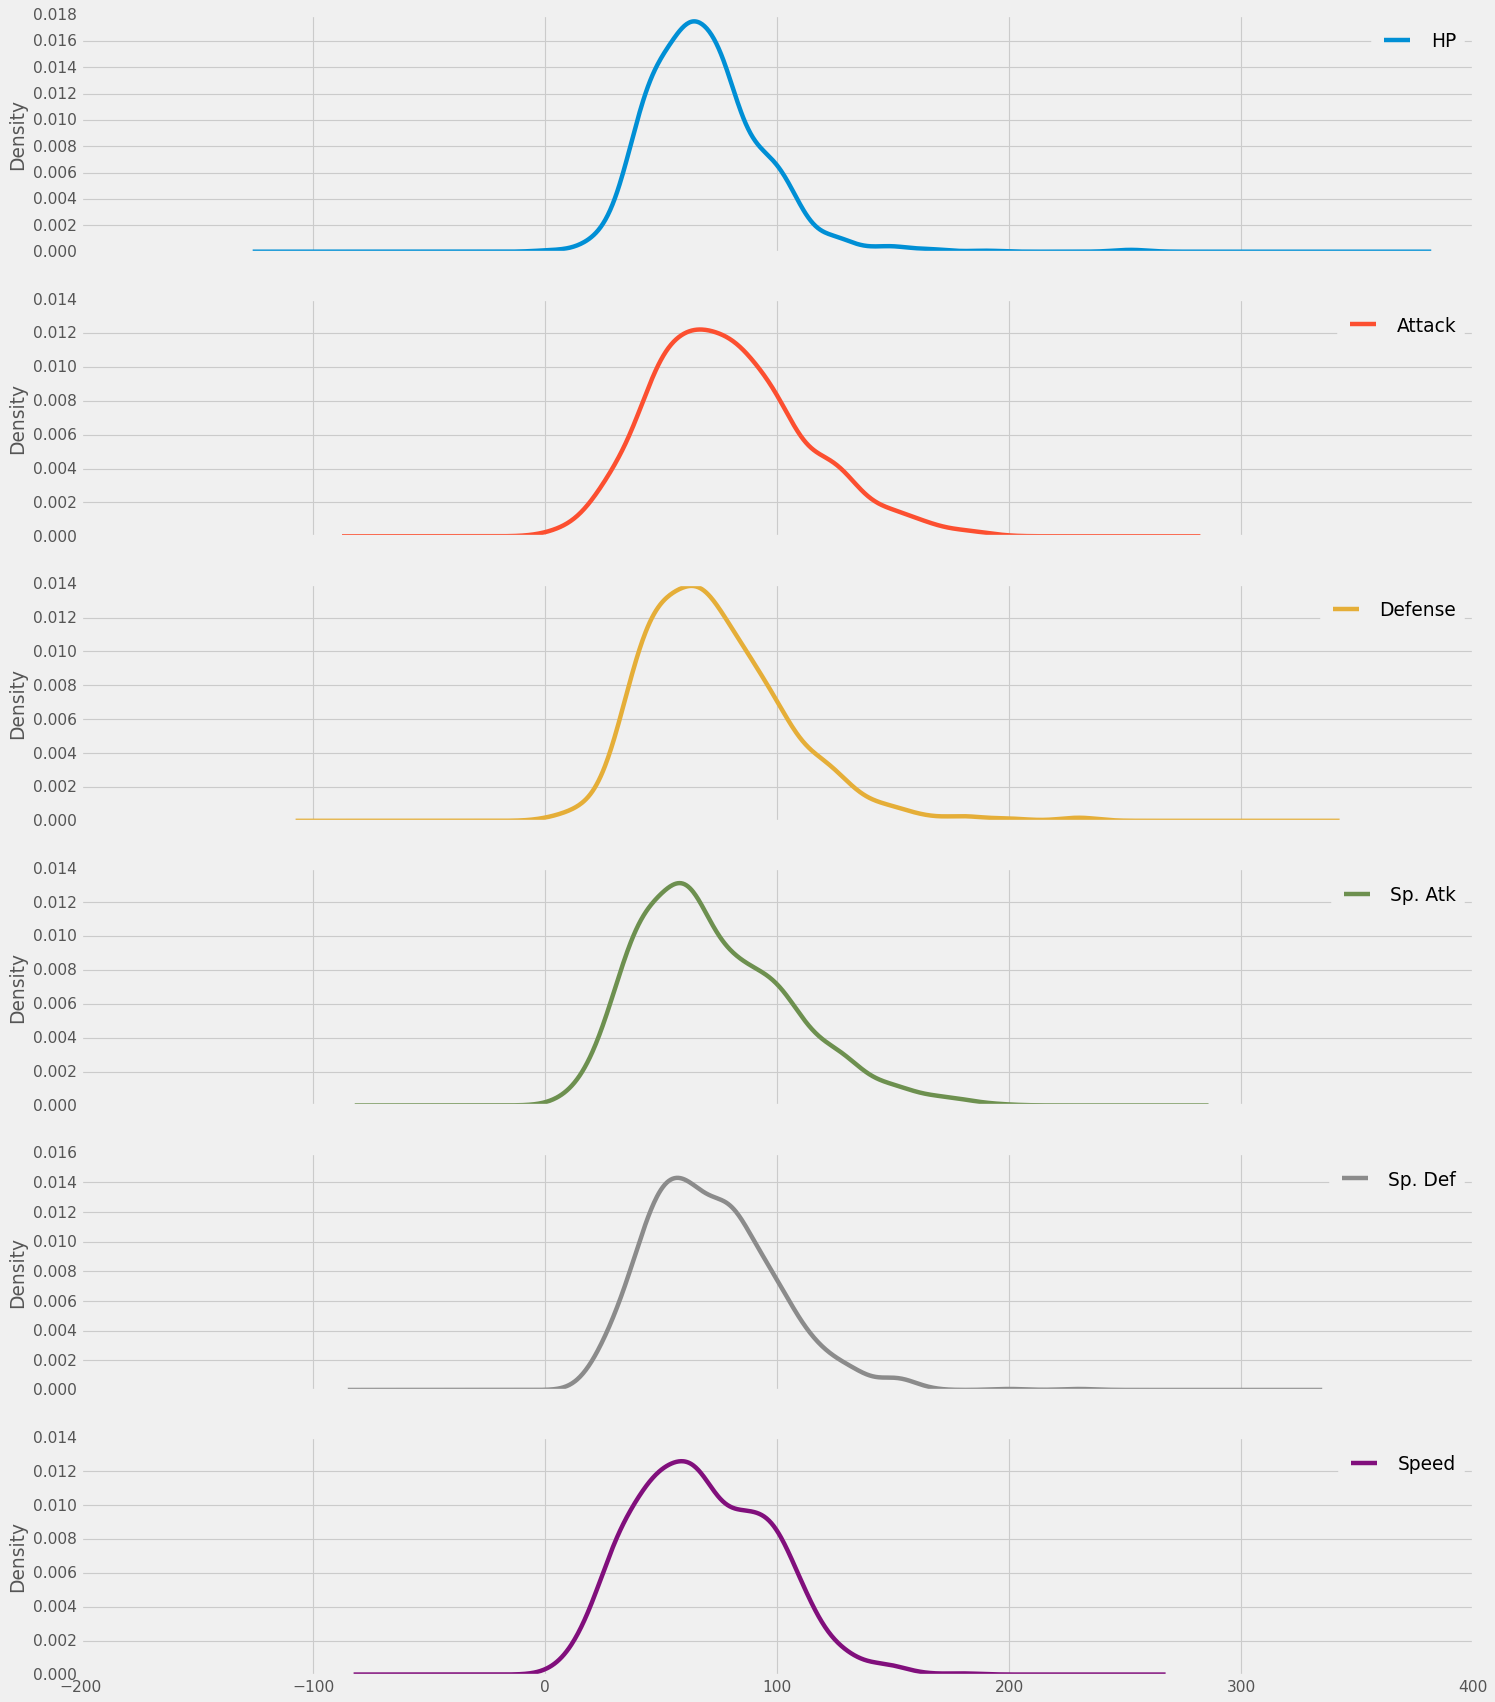

In [37]:
#Density plot of the data
style.use('fivethirtyeight')
col=['Generation','Total']
P_data.drop(columns=col,axis=0).plot(subplots=True,kind='kde',figsize=(20,25))
plt.show()

- 'Total' Variable shows double mode,
- Variable 'HP' shows Platykurtic
- Attack, Defence, special attack, special defence Right/Positively skewed distributed.
- Speed is mesokurtic.

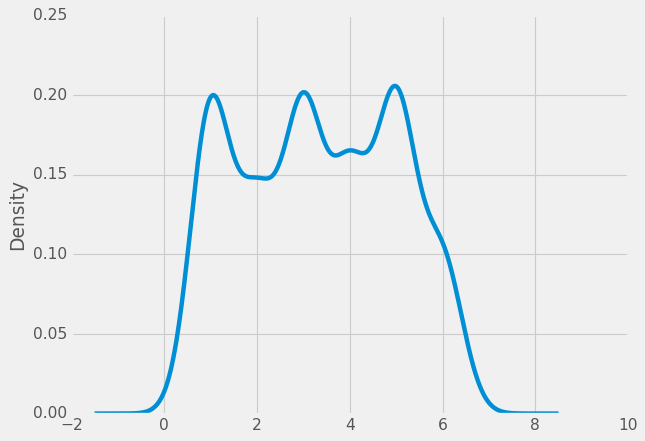

In [40]:
##Density plot of variable 'Generation'
P_data['Generation'].plot(kind='kde')
plt.show()

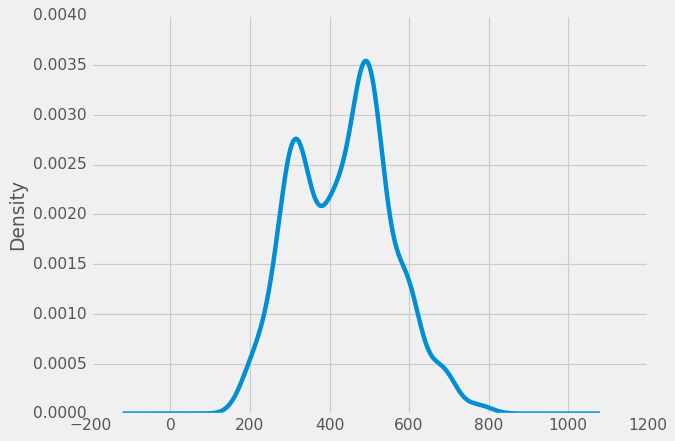

In [41]:
##Density plot of variable 'Total'
P_data['Total'].plot(kind='kde')
plt.show()

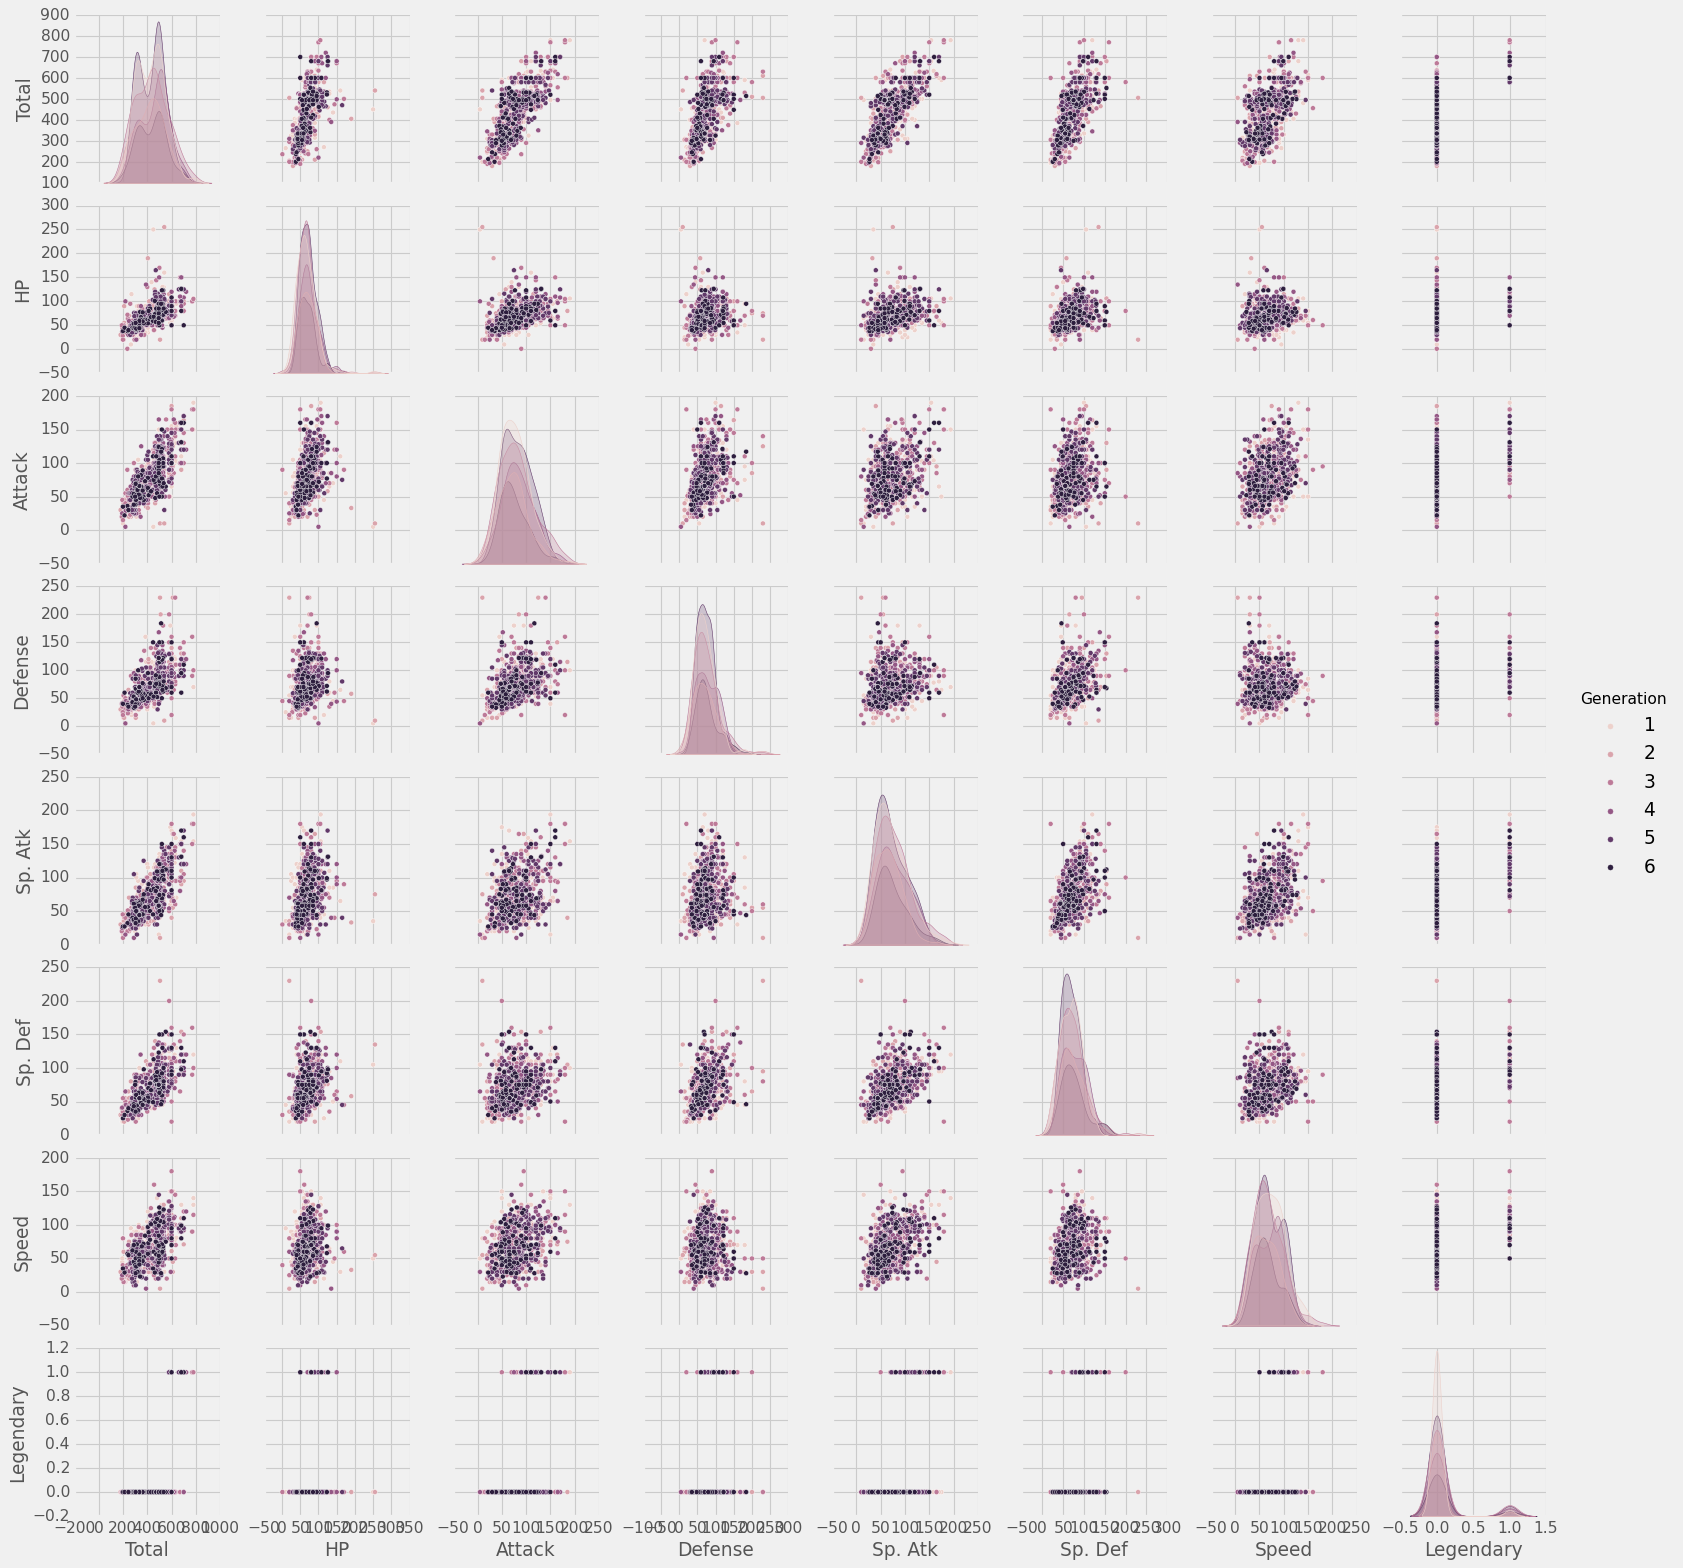

In [20]:
#Pairplot of the data
import seaborn as sns
sns.pairplot(P_data.drop('Name',axis=1),hue='Generation')

In [21]:
P_data.describe(include='all')   #1) Description of data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800,800,800,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Emolga,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,112,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [48]:
#Central tendency of the data
import statistics
print('Mean of the data: \n',P_data.mean())
print('________________________________________________________\n')
print('Median of the data: \n',P_data.median())
print('___________________________________________________________\n')
print('Mode of the data: \n',P_data.drop(columns='Name',axis=0).mode())
print('___________________________________________________________________________\n')
print('variance of the data: \n',P_data.var())
print('___________________________________________________________________________\n')
print('Standard Deviation of the data: \n',P_data.drop(columns='Name',axis=0).std())

Mean of the data: 
 Total         435.10250
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp. Atk        72.82000
Sp. Def        71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
dtype: float64
________________________________________________________

Median of the data: 
 Total         450.0
HP             65.0
Attack         75.0
Defense        70.0
Sp. Atk        65.0
Sp. Def        70.0
Speed          65.0
Generation      3.0
Legendary       0.0
dtype: float64
___________________________________________________________

Mode of the data: 
   Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  Water  Flying    600  60     100       70       60       80     50   

   Generation  Legendary  
0           1      False  
___________________________________________________________________________

variance of the data: 
 Total         14391.130907
HP              652.019323
Attack         1053.480599
Defense   

In [23]:
P_data.skew()    ##Skewness of the data

Total         0.152530
HP            1.568224
Attack        0.551614
Defense       1.155912
Sp. Atk       0.744662
Sp. Def       0.854019
Speed         0.357933
Generation    0.014258
Legendary     3.071072
dtype: float64

In [24]:
P_data.kurtosis()   ##Kurtosis of the data

Total        -0.507461
HP            7.232078
Attack        0.169717
Defense       2.726260
Sp. Atk       0.297894
Sp. Def       1.628394
Speed        -0.236437
Generation   -1.239576
Legendary     7.450100
dtype: float64

1. if kurtosis >3, then it is leptokurtic
2. if kutosisi<3, then platykurtic
3. if kurtosis=3, then mesokurtic.

Now here in our data, -0.5, Variables 'total','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation' are Platykurtic because all these has kutrosis<3. Variable 'HP', 'Legendary' are leptokurtic because this two has kurtosis>3.

In [25]:
##Checking outliers for Hp
print('All about variable HP \n')
q1_hp=P_data['HP'].quantile(0.25); q3_hp=P_data['HP'].quantile(0.50); IQR_hp=q3_hp-q1_hp
upper_hp=q3_hp+IQR_hp*1.5; lower_hp=q1_hp-IQR_hp*1.5
min_hp=P_data['HP'].min(); max_hp=P_data['HP'].max()
print(' First Quartile of q1_hp is: %i \n Third Quartile of q3_hp is: %i \n InterQuartile range of IQR_hp is: %i' %(q1_hp,q3_hp,IQR_hp))
print(' Upper outlier of upper_hp is: %i \n lower outlier of lower_hp is: %i' %(upper_hp,lower_hp))
print(' maximum observation of max_hp is: %i \n minimum observation of min_hp is: %i' %(max_hp,min_hp))

if upper_hp<max_hp:
    print('Upper outlier is present in HP variable')
else:
    print('No Outlier is present in HP Variable')
if lower_hp<min_hp:
    print('Lower Outlier is present in HP variable')
else:
    print('No Outlier is present in HP Variable')
    
print('_______________________________________________________')
##Checking outliers for Attack
print('All about variable Attack \n')
q1_at=P_data['Attack'].quantile(0.25); q3_at=P_data['Attack'].quantile(0.50); IQR_at=q3_at-q1_at
upper_at=q3_at+IQR_at*1.5; lower_at=q1_at-IQR_at*1.5
min_at=P_data['Attack'].min(); max_at=P_data['Attack'].max()
print(' First Quartile of q1_at is: %i \n Third Quartile of q3_at is: %i \n InterQuartile range of IQR_at is: %i' %(q1_at,q3_at,IQR_at))
print(' Upper outlier of upper_at is: %i \n lower outlier of lower_at is: %i' %(upper_at,lower_at))
print(' maximum observation of max_at is: %i \n minimum observation of min_at is: %i' %(max_at,min_at))

if upper_at<max_at:
    print('Upper outlier is present in Attack variable')
else:
    print('No Outlier is present in Attack Variable')
if lower_at<min_at:
    print('Lower Outlier is present in Attack variable')
else:
    print('No Outlier is present in Attack Variable')
    
    
print('_______________________________________________________')
##Checking outliers for Defense
print('All about variable Defense \n')
q1_def=P_data['Defense'].quantile(0.25); q3_def=P_data['Defense'].quantile(0.50); IQR_def=q3_def-q1_def
upper_def=q3_def+IQR_def*1.5; lower_def=q1_def-IQR_def*1.5
min_def=P_data['Defense'].min(); max_def=P_data['Defense'].max()
print(' First Quartile of q1_def is: %i \n Third Quartile of q3_def is: %i \n InterQuartile range of IQR_def is: %i' %(q1_def,q3_def,IQR_def))
print(' Upper outlier of upper_def is: %i \n lower outlier of lower_def is: %i' %(upper_def,lower_def))
print(' maximum observation of max_def is: %i \n minimum observation of min_def is: %i' %(max_def,min_def))

if upper_def<max_def:
    print('Upper outlier is present in Defense variable')
else:
    print('No Outlier is present in Defense Variable')
if lower_def<min_def:
    print('Lower Outlier is present in Defense variable')
else:
    print('No Outlier is present in Defense Variable')

All about variable HP 

 First Quartile of q1_hp is: 50 
 Third Quartile of q3_hp is: 65 
 InterQuartile range of IQR_hp is: 15
 Upper outlier of upper_hp is: 87 
 lower outlier of lower_hp is: 27
 maximum observation of max_hp is: 255 
 minimum observation of min_hp is: 1
Upper outlier is present in HP variable
No Outlier is present in HP Variable
_______________________________________________________
All about variable Attack 

 First Quartile of q1_at is: 55 
 Third Quartile of q3_at is: 75 
 InterQuartile range of IQR_at is: 20
 Upper outlier of upper_at is: 105 
 lower outlier of lower_at is: 25
 maximum observation of max_at is: 190 
 minimum observation of min_at is: 5
Upper outlier is present in Attack variable
No Outlier is present in Attack Variable
_______________________________________________________
All about variable Defense 

 First Quartile of q1_def is: 50 
 Third Quartile of q3_def is: 70 
 InterQuartile range of IQR_def is: 20
 Upper outlier of upper_def is: 100 


In [26]:
##Checking outliers for Special Attack
print('All about variable Special Attack \n')
q1_atk=P_data['Sp. Atk'].quantile(0.25); q3_atk=P_data['Sp. Atk'].quantile(0.50); IQR_atk=q3_atk-q1_atk
upper_atk=q3_atk+IQR_atk*1.5; lower_atk=q1_atk-IQR_atk*1.5
min_atk=P_data['Sp. Atk'].min(); max_atk=P_data['Sp. Atk'].max()
print(' First Quartile of q1_atk is: %i \n Third Quartile of q3_atk is: %i \n InterQuartile range of IQR_atk is: %i' %(q1_atk,q3_atk,IQR_atk))
print(' Upper outlier of upper_atk is: %i \n lower outlier of lower_atk is: %i' %(upper_atk,lower_atk))
print(' maximum observation of max_atk is: %i \n minimum observation of min_atk is: %i' %(max_atk,min_atk))

if upper_atk<max_atk:
    print('Upper outlier is present in Special Attack variable')
else:
    print('No Outlier is present in Special Attack Variable')
if lower_atk<min_atk:
    print('Lower Outlier is present in Special Attack variable')
else:
    print('No Outlier is present in Special Attack Variable')
    
print('__________________________________________________________________________\n')
##Checking outliers for Special Defense
print('All about variable Special Defence \n')
q1_sdf=P_data['Sp. Def'].quantile(0.25); q3_sdf=P_data['Sp. Def'].quantile(0.50); IQR_sdf=q3_sdf-q1_sdf
upper_sdf=q3_sdf+IQR_sdf*1.5; lower_sdf=q1_sdf-IQR_sdf*1.5
min_sdf=P_data['Sp. Def'].min(); max_sdf=P_data['Sp. Def'].max()
print(' First Quartile of q1_sdf is: %i \n Third Quartile of q3_sdf is: %i \n InterQuartile range of IQR_sdf is: %i' %(q1_sdf,q3_sdf,IQR_sdf))
print(' Upper outlier of upper_sdf is: %i \n lower outlier of lower_sdf is: %i' %(upper_sdf,lower_sdf))
print(' maximum observation of max_sdf is: %i \n minimum observation of min_sdf is: %i' %(max_sdf,min_sdf))

if upper_sdf<max_sdf:
    print('Upper outlier is present in Special Defence variable')
else:
    print('No Outlier is present in Special Defence Variable')
if lower_sdf<min_sdf:
    print('Lower Outlier is present in Special Defence variable')
else:
    print('No Outlier is present in Special Defence Variable')
    
print('__________________________________________________________________________\n')
##Checking outliers for Special Defense
print('All about variable Speed \n')
q1_sp=P_data['Speed'].quantile(0.25); q3_sp=P_data['Speed'].quantile(0.50); IQR_sp=q3_sp-q1_sp
upper_sp=q3_sp+IQR_sp*1.5; lower_sp=q1_sp-IQR_sp*1.5
min_sp=P_data['Speed'].min(); max_sp=P_data['Speed'].max()
print(' First Quartile of q1_sp is: %i \n Third Quartile of q3_sp is: %i \n InterQuartile range of IQR_sp is: %i' %(q1_sp,q3_sp,IQR_sp))
print(' Upper outlier of upper_sp is: %i \n lower outlier of lower_sp is: %i' %(upper_sp,lower_sp))
print(' maximum observation of max_sp is: %i \n minimum observation of min_sp is: %i' %(max_sp,min_sp))

if upper_sp<max_sp:
    print('Upper outlier is present in Special Defence variable')
else:
    print('No Outlier is present in Special Defence Variable')
if lower_sp<min_sp:
    print('Lower Outlier is present in Special Defence variable')
else:
    print('No Outlier is present in Special Defence Variable')

All about variable Special Attack 

 First Quartile of q1_atk is: 49 
 Third Quartile of q3_atk is: 65 
 InterQuartile range of IQR_atk is: 15
 Upper outlier of upper_atk is: 87 
 lower outlier of lower_atk is: 26
 maximum observation of max_atk is: 194 
 minimum observation of min_atk is: 10
Upper outlier is present in Special Attack variable
No Outlier is present in Special Attack Variable
__________________________________________________________________________

All about variable Special Defence 

 First Quartile of q1_sdf is: 50 
 Third Quartile of q3_sdf is: 70 
 InterQuartile range of IQR_sdf is: 20
 Upper outlier of upper_sdf is: 100 
 lower outlier of lower_sdf is: 20
 maximum observation of max_sdf is: 230 
 minimum observation of min_sdf is: 20
Upper outlier is present in Special Defence variable
No Outlier is present in Special Defence Variable
__________________________________________________________________________

All about variable Speed 

 First Quartile of q1_sp is

<AxesSubplot:>

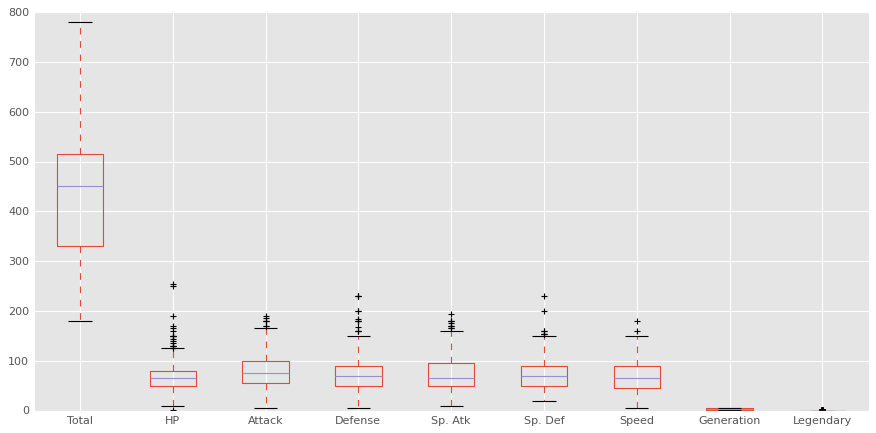

In [27]:
# Boxplot of the data.
style.use('ggplot')
P_data.boxplot(figsize=(12,6))

As per the our manual test and through boxplot graph we get upper outliers in all numerical variables except variable 'Total'